# 1st model is best
Just run it for better accuracy

### 2nd

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K


In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape (60000, 28, 28) y_train shape (60000,)
60000 train_set
60000 test_set
y = 2 Pullover


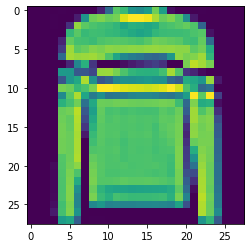

In [3]:
print("x_train shape",x_train.shape,"y_train shape",y_train.shape)
print(x_train.shape[0],'train_set')
print(y_train.shape[0],'test_set')
#define text labels
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print("Number of train data - "+ str(len(x_train)))
print("number of test data - "+ str(len(x_test)))

Number of train data - 60000
number of test data - 10000


In [6]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

In [7]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_valid = x_valid.reshape(x_valid.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [9]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [10]:
from tensorflow.keras.layers import Activation
from keras.layers import Dense, Dropout 


In [16]:
#size of parameters
batch_size = 128
num_classes = 10
epochs = 10
filter_pixel=3
noise = 1
droprate=0.25
#Start Neural Network
model = Sequential()
#convolution 1st layer
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), padding="same",
                 activation='relu',
                 input_shape=(28,28,1))) #0
model.add(BatchNormalization())
model.add(Dropout(droprate))#3
#model.add(MaxPooling2D())

#convolution 2nd layer
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu'))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))#3

#convolution 3rd layer
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu'))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))#3

#Fully connected 1st layer
model.add(Flatten()) #7
model.add(Dense(500,use_bias=False)) #13
model.add(BatchNormalization())
model.add(Activation('relu')) #14
model.add(Dropout(droprate))      #15

#Fully connected final layer
model.add(Dense(10)) #8
#model.add(Activation('softmax')) #9


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)      

In [20]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_valid, y_valid))

430/430 [==============================] - 390s 907ms/step - loss: 8.9723 - accuracy: 0.1677 - val_loss: 5.9326 - val_accuracy: 0.1980


In [23]:
# make predictions
from sklearn.metrics import classification_report
preds = model.predict(x_test)

# show the nicely formatted classification report
print("Evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
     target_names=fashion_mnist_labels))


Evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.04      0.10      0.06      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.27      0.06      0.09      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.32      0.96      0.48      1000
       Shirt       0.19      0.78      0.30      1000
     Sneaker       0.72      0.09      0.17      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.15      0.20      0.11     10000
weighted avg       0.15      0.20      0.11     10000



C:\Users\haider computer s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haider computer s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haider computer s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
### Save model
###==========================================
from keras.models import load_model 
model.save('fashion_mnist_cnn_model.h5') # creates a HDF5 file 'my_model.h5' 

# Final evaluation of the model
scores = model.evaluate(x_train, y_train, verbose=1)
print("Train Score: %.2f%%" % (scores[0]*100))
print("Train Accuracy: %.2f%%" % (scores[1]*100))

############## Final evaluation of the model For Test Set
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Score: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))


1719/1719 [==============================] - 86s 50ms/step - loss: 5.9258 - accuracy: 0.1996
Train Score: 592.58%
Train Accuracy: 19.96%
313/313 [==============================] - 17s 53ms/step - loss: 5.9831 - accuracy: 0.1993
Test Score: 598.31%
Test Accuracy: 19.93%


In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


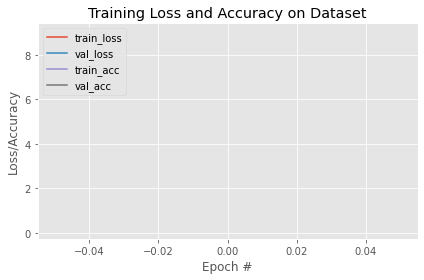

In [32]:
#plot the training loss and accuray
NUM_EPOCHS = 1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label='train_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# # plt.savefig("plot_perf.png")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("plot_loss_acc.png", dpi = 50)
plt.show()